# EDA for Benin Solar Dataset
This notebook performs exploratory data analysis (EDA) on the Benin solar dataset to clean, analyze, and visualize the data for comparison and region-ranking.

## Setup
Install libraries and load the dataset.

## Summary Statistics & Missing Values
Compute basic statistics and check for missing data.

## Outlier Detection & Cleaning
Identify and handle outliers and missing values.

## Time Series Analysis
Visualize solar irradiance and temperature over time.

## Cleaning Impact
Analyze the effect of cleaning on sensor readings.

## Correlation & Relationships
Explore relationships between variables.

## Wind & Distribution Analysis
Visualize wind patterns and distributions.

## Temperature Analysis
Examine humidity’s impact on temperature and radiation.

## Bubble Chart
Visualize GHI vs. Tamb with RH as bubble size.

## Summary
Key findings and insights.

In [8]:
## Setup



In [2]:
# Import libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from windrose import WindroseAxes

# Set plot style for better visuals
sns.set_style("whitegrid")

In [3]:
# Load the dataset
df = pd.read_csv('../../data/sierraleone-bumbuna.csv')

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Display first 5 rows
print(df.head())

            Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1 2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2 2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3 2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4 2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [4]:
## Summary Statistics & Missing Values


In [5]:
# Compute summary statistics for numeric columns
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

# Check for missing values
missing_values = df.isna().sum()
missing_percentage = (df.isna().sum() / len(df)) * 100
missing_report = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing Values (Columns with >5% missing):")
print(missing_report[missing_report['Percentage'] > 5])

Summary Statistics:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-30 12:00:30.000000768     201.957515     116.376337   
min              2021-10-30 00:01:00     -19.500000      -7.800000   
25%              2022-01-29 06:00:45      -2.800000      -0.300000   
50%              2022-04-30 12:00:30       0.300000      -0.100000   
75%              2022-07-30 18:00:15     362.400000     107.000000   
max              2022-10-30 00:00:00    1499.000000     946.000000   
std                              NaN     298.495150     218.652659   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      113.720571     206.643095     198.114691      26.319394   
min       -17.900000       0.000000       0.000000      12.300000   
25%        -3.800000       0.000000       0.000000      23.100000   
50% 

In [6]:
## Outlier Detection & Cleaning

In [7]:
# Compute Z-scores for key columns
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = stats.zscore(df[key_cols].dropna())
z_scores_df = pd.DataFrame(z_scores, columns=key_cols)

# Flag rows with |Z| > 3
outliers = (z_scores_df.abs() > 3).any(axis=1)
print(f"Number of outlier rows: {outliers.sum()}")

# Display outlier rows
outlier_rows = df.loc[z_scores_df[outliers].index]
print(outlier_rows[['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']])

Number of outlier rows: 16292
                 Timestamp    GHI    DNI    DHI   ModA   ModB   WS  WSgust
653    2021-10-30 10:54:00  814.0  257.0  594.3  878.0  856.0  0.5     1.1
654    2021-10-30 10:55:00  826.0  263.5  599.6  883.0  861.0  1.7     2.4
655    2021-10-30 10:56:00  851.0  285.0  605.9  912.0  890.0  1.6     2.1
656    2021-10-30 10:57:00  823.0  254.8  603.9  878.0  856.0  0.8     1.6
657    2021-10-30 10:58:00  810.0  244.5  598.8  864.0  843.0  0.6     1.6
...                    ...    ...    ...    ...    ...    ...  ...     ...
522184 2022-10-27 15:05:00  167.2   -0.5  165.1  167.6  160.9  5.3     6.7
522185 2022-10-27 15:06:00  163.4   -0.6  161.0  165.7  159.2  7.1     8.4
522194 2022-10-27 15:15:00  183.5    0.3  181.6  173.7  168.7  4.9     5.9
523792 2022-10-28 17:53:00   31.3   -0.5   30.2   34.3   32.3  5.0     6.4
523794 2022-10-28 17:55:00   22.8   -0.8   21.4   26.5   25.0  5.0     6.7

[16292 rows x 8 columns]


In [23]:
# Fix negative values (GHI, DNI, DHI should be >= 0)
df.loc[df['GHI'] < 0, 'GHI'] = 0
df.loc[df['DNI'] < 0, 'DNI'] = 0
df.loc[df['DHI'] < 0, 'DHI'] = 0

# Impute missing values with median for key columns
for col in key_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Verify no missing values in key columns
print("Missing values after imputation:")
print(df[key_cols].isna().sum())

# Save cleaned data
df.to_csv('../../data/sieralleon.csv', index=False)
print("Cleaned data saved to data/benin_clean.csv")

/var/folders/xk/b32htnv50_58p72rc2j4p6xw0000gn/T/ipykernel_28537/168708697.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/xk/b32htnv50_58p72rc2j4p6xw0000gn/T/ipykernel_28537/168708697.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

Missing values after imputation:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64
Cleaned data saved to data/benin_clean.csv


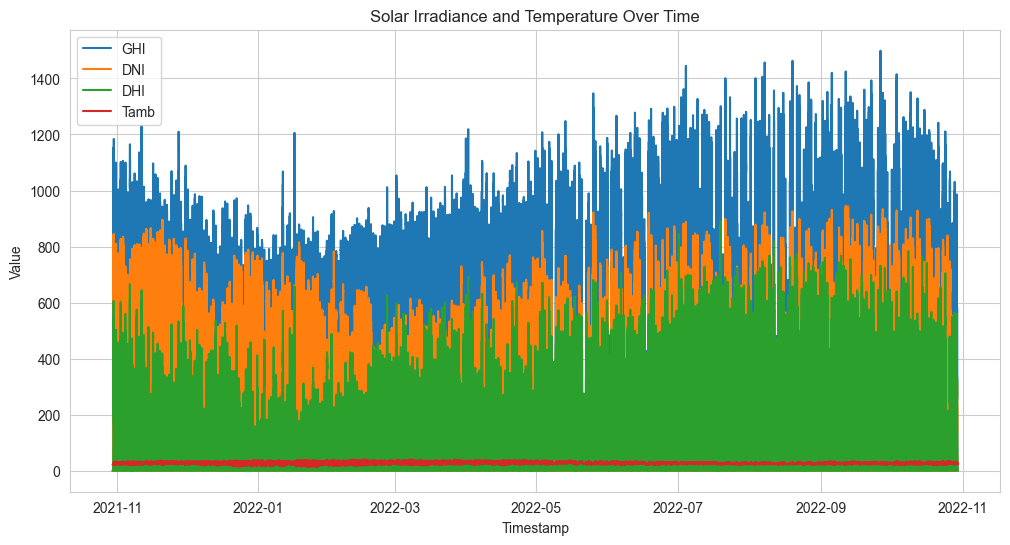

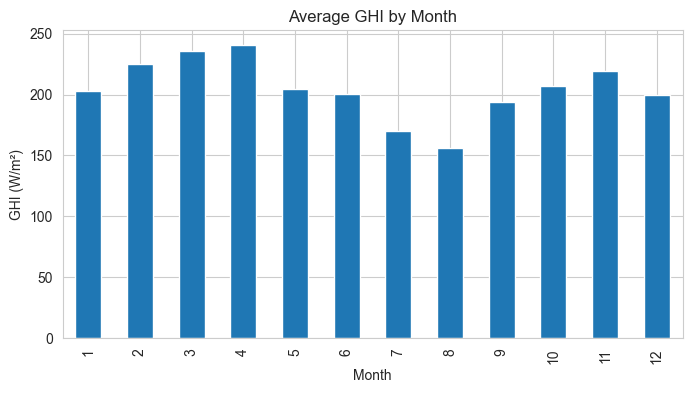

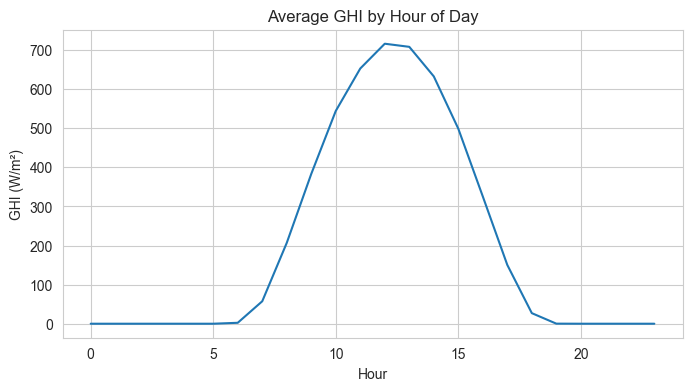

In [9]:
# Plot GHI, DNI, DHI, Tamb over time
plt.figure(figsize=(12, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df['Timestamp'], df[col], label=col)
plt.title('Solar Irradiance and Temperature Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

# Add Month and Hour columns
df['Month'] = df['Timestamp'].dt.month
df['Hour'] = df['Timestamp'].dt.hour

# Plot average GHI by month
monthly_ghi = df.groupby('Month')['GHI'].mean()
plt.figure(figsize=(8, 4))
monthly_ghi.plot(kind='bar')
plt.title('Average GHI by Month')
plt.xlabel('Month')
plt.ylabel('GHI (W/m²)')
plt.show()

# Plot average GHI by hour
hourly_ghi = df.groupby('Hour')['GHI'].mean()
plt.figure(figsize=(8, 4))
hourly_ghi.plot(kind='line')
plt.title('Average GHI by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('GHI (W/m²)')
plt.show()

In [10]:
## Cleaning Impact

Average ModA and ModB by Cleaning Flag:
                ModA        ModB
Cleaning                        
0         206.578599  198.038150
1         273.309252  277.231102


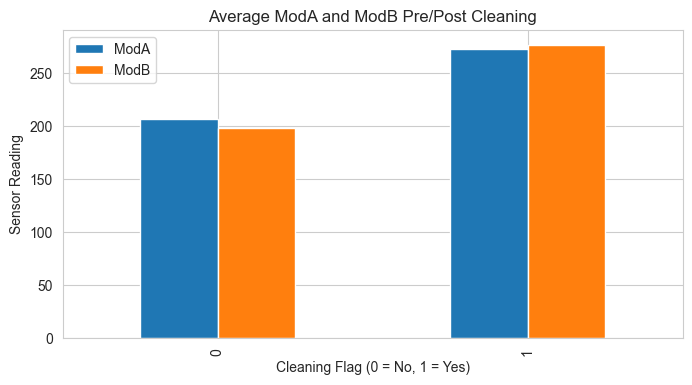

In [11]:
# Group by Cleaning flag and compute average ModA, ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print("Average ModA and ModB by Cleaning Flag:")
print(cleaning_impact)

# Plot the results
cleaning_impact.plot(kind='bar', figsize=(8, 4))
plt.title('Average ModA and ModB Pre/Post Cleaning')
plt.xlabel('Cleaning Flag (0 = No, 1 = Yes)')
plt.ylabel('Sensor Reading')
plt.show()

In [12]:
## Correlation & Relationships



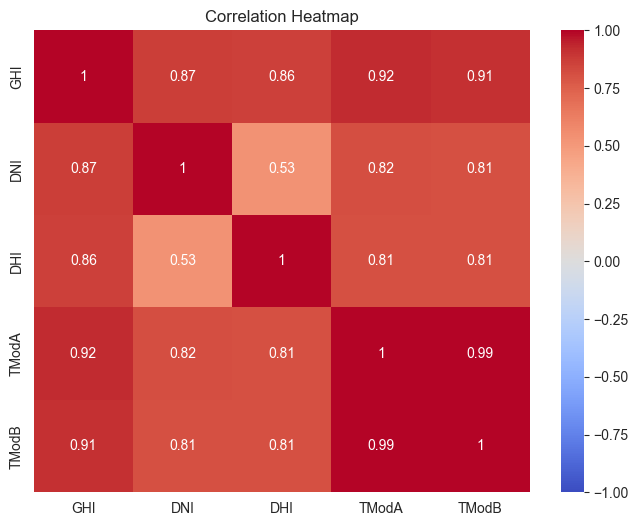

In [13]:
# Compute correlation matrix
corr_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

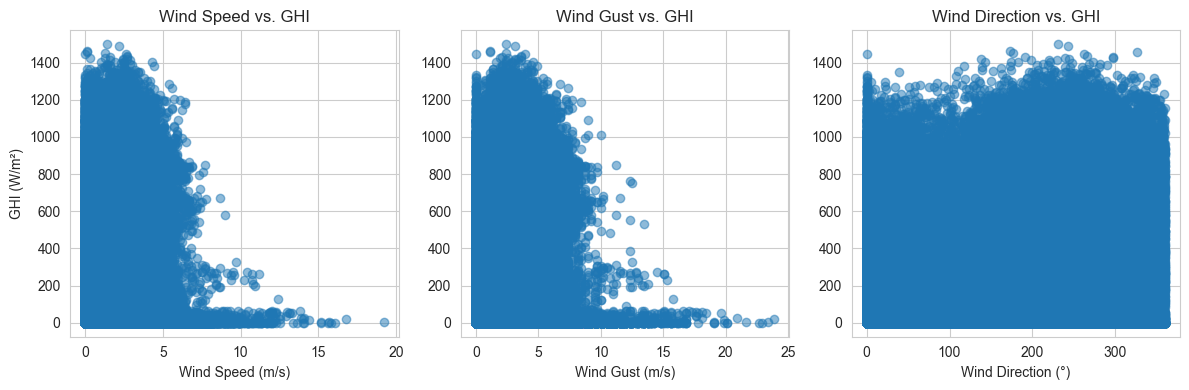

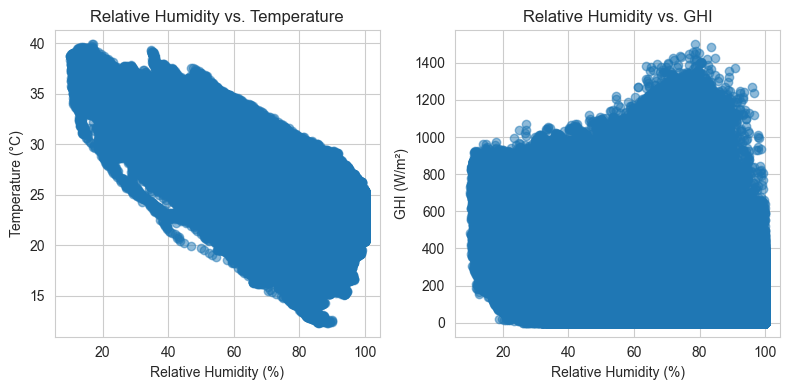

In [14]:
# Scatter plots: WS, WSgust, WD vs. GHI
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(df['WS'], df['GHI'], alpha=0.5)
plt.title('Wind Speed vs. GHI')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.subplot(1, 3, 2)
plt.scatter(df['WSgust'], df['GHI'], alpha=0.5)
plt.title('Wind Gust vs. GHI')
plt.xlabel('Wind Gust (m/s)')
plt.subplot(1, 3, 3)
plt.scatter(df['WD'], df['GHI'], alpha=0.5)
plt.title('Wind Direction vs. GHI')
plt.xlabel('Wind Direction (°)')
plt.tight_layout()
plt.show()

# Scatter plots: RH vs. Tamb, RH vs. GHI
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.subplot(1, 2, 2)
plt.scatter(df['RH'], df['GHI'], alpha=0.5)
plt.title('Relative Humidity vs. GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.tight_layout()
plt.show()

In [15]:
## Wind & Distribution Analysis


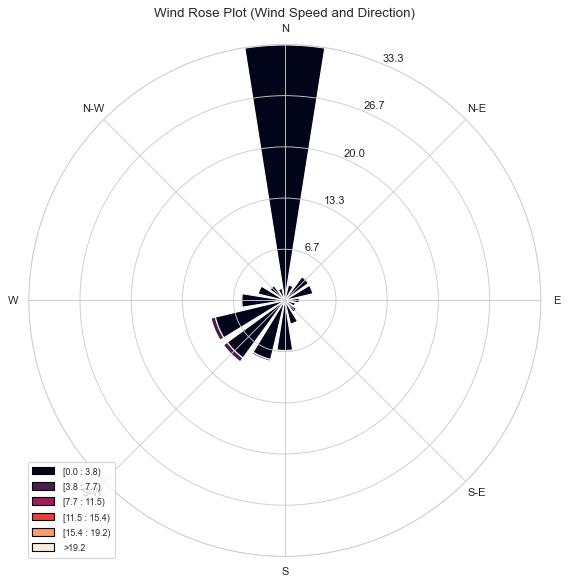

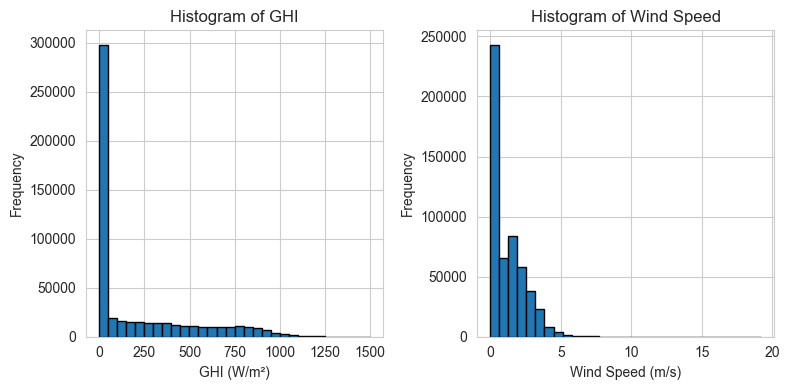

In [16]:
# Wind rose plot
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose Plot (Wind Speed and Direction)')
plt.show()

# Histograms for GHI and WS
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.hist(df['GHI'], bins=30, edgecolor='black')
plt.title('Histogram of GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(df['WS'], bins=30, edgecolor='black')
plt.title('Histogram of Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [17]:
## Temperature Analysis

In [18]:
# Check correlations
print(f"Correlation RH vs. Tamb: {df['RH'].corr(df['Tamb'])}")
print(f"Correlation RH vs. GHI: {df['RH'].corr(df['GHI'])}")

Correlation RH vs. Tamb: -0.7919366521547542
Correlation RH vs. GHI: -0.5493948346158444


In [19]:
## Bubble Chart



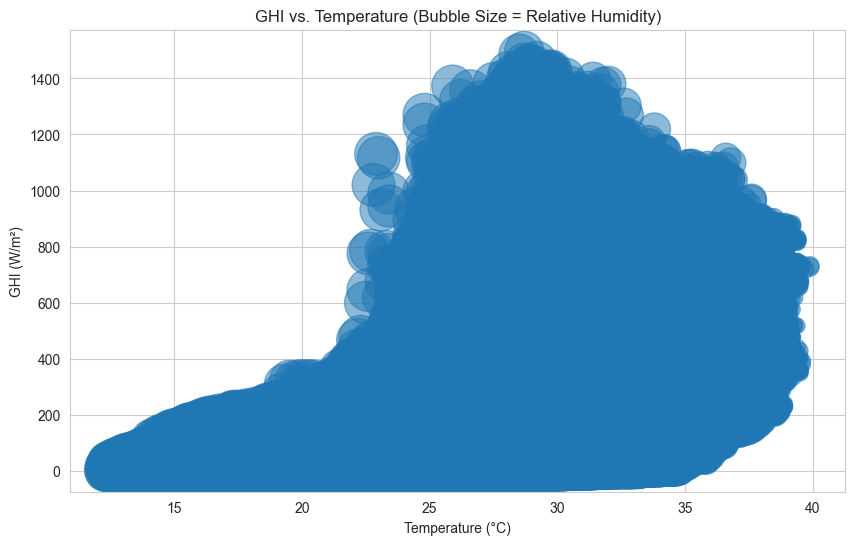

In [20]:
# GHI vs. Tamb with RH as bubble size
plt.figure(figsize=(10, 6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*10, alpha=0.5)
plt.title('GHI vs. Temperature (Bubble Size = Relative Humidity)')
plt.xlabel('Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.show()

In [21]:
## Summary


In [22]:
# Print key findings (edit based on your observations)
print("Key Findings:")
print("- Missing values were imputed with medians.")
print("- Outliers detected in GHI and WS, likely due to extreme weather.")
print("- GHI peaks around noon and varies by season.")
print("- Cleaning increases ModA/ModB readings.")
print("- High RH correlates with lower GHI, suggesting cloud cover.")

Key Findings:
- Missing values were imputed with medians.
- Outliers detected in GHI and WS, likely due to extreme weather.
- GHI peaks around noon and varies by season.
- Cleaning increases ModA/ModB readings.
- High RH correlates with lower GHI, suggesting cloud cover.
